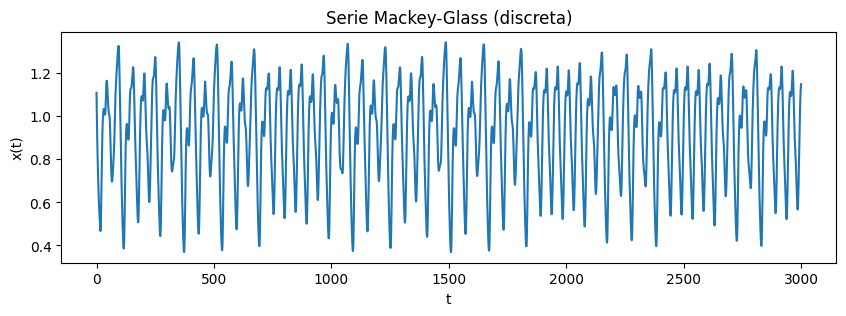

Shapes: (1970, 30, 1) (1970,) (470, 30, 1) (470,) (470, 30, 1) (470,)


Model: "cnn1d_mackey_glass"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 30, 32)         │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 30, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (ReLU)                    │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 30, 64)         │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 30, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (ReLU)                    │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 30, 64)         │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 30, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (ReLU)                    │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling1D)    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ yhat (Dense)                    │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,457 (91.63 KB)

 Trainable params: 23,137 (90.38 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5792 - mae: 0.5966 - val_loss: 0.8479 - val_mae: 0.7618 - learning_rate: 0.0010
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1137 - mae: 0.2717 - val_loss: 0.8525 - val_mae: 0.7273 - learning_rate: 0.0010
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0705 - mae: 0.2120 - val_loss: 0.8423 - val_mae: 0.7032 - learning_rate: 0.0010
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0676 - mae: 0.2084 - val_loss: 0.8165 - val_mae: 0.6875 - learning_rate: 0.0010
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0737 - mae: 0.2173 - val_loss: 0.7782 - val_mae: 0.6710 - learning_rate: 0.0010
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0586 - mae: 0.1919 - val_loss: 0.8069 - val_mae: 0.6824 - learning_rate: 0.0010
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0658 - mae: 0.2020 - val_loss: 0.6470 - val_mae: 0.6141 - learning_rate: 0.0010
Epoch 8/25
31

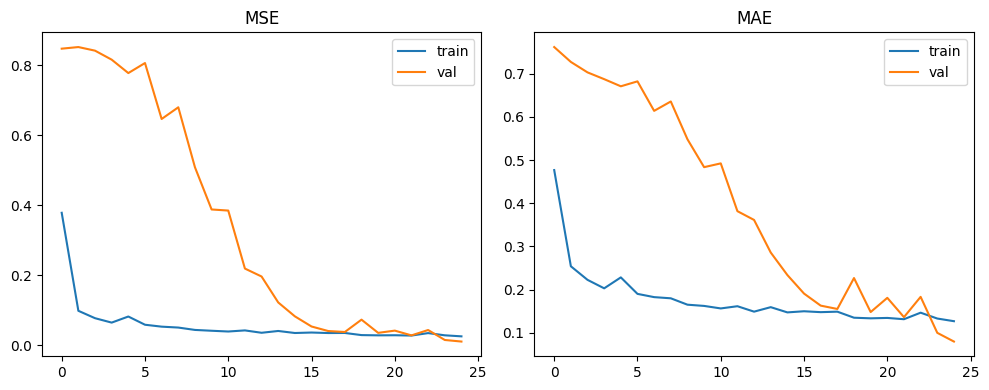

Test MSE: 0.009069 | Test MAE: 0.074087


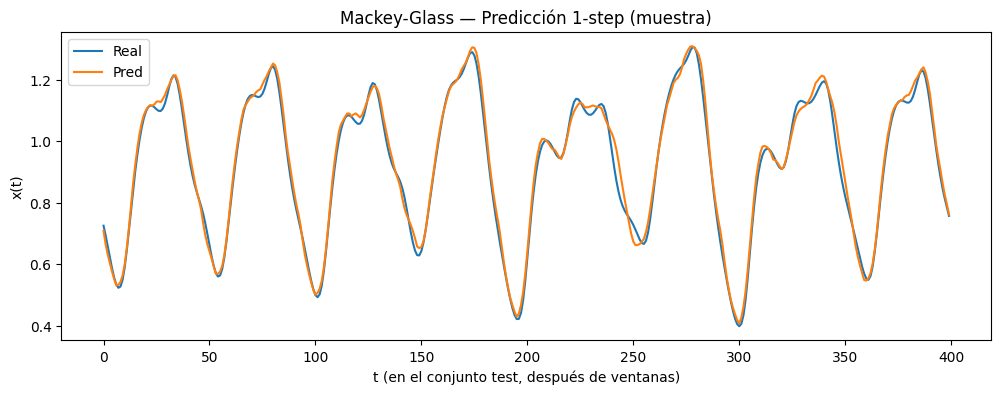

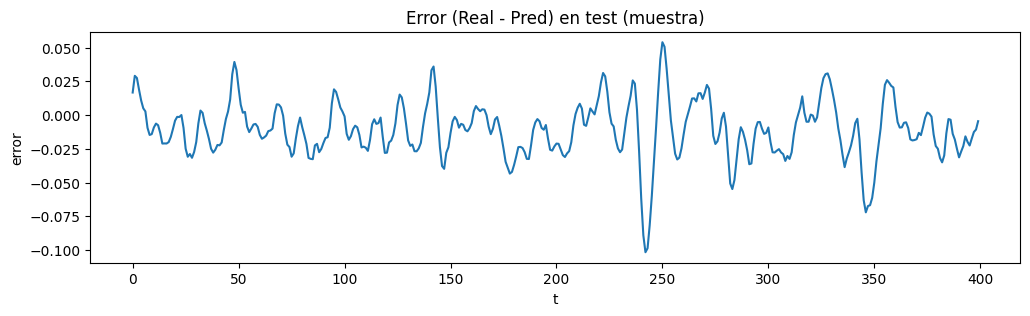

In [1]:
# ==============================================================
# CNN 1D + Mackey-Glass (predicción 1-step ahead) — Google Colab
# - Genera la serie Mackey-Glass (discreta)
# - Crea ventanas (sliding window)
# - CNN1D (opción causal) para predicción
# - Evalúa y grafica resultados
# ==============================================================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math

# ----------------------------
# 0) HIPERPARÁMETROS (EDITA AQUÍ)
# ----------------------------
CFG = {
    # Serie Mackey-Glass (discreta)
    "mg_beta": 0.2,
    "mg_gamma": 0.1,
    "mg_n": 10,
    "mg_tau": 17,          # retardo en pasos discretos
    "mg_dt": 1.0,          # paso (discreto)
    "mg_length": 3000,     # total de puntos

    # Dataset (ventanas)
    "window": 30,          # longitud de la ventana de entrada
    "horizon": 1,          # predicción a 1 paso
    "train_size": 2000,    # puntos para entrenamiento (antes de ventanas)
    "val_size": 500,       # puntos para validación
    "test_size": 500,      # puntos para prueba

    # Normalización
    "normalize": "zscore", # "zscore" | "minmax" | None

    # Modelo CNN
    "use_causal": True,    # convolución causal (no mira futuro dentro de la ventana)
    "filters": [32, 64, 64],
    "kernel_sizes": [5, 3, 3],
    "dropout": 0.2,
    "dense_units": [64],

    # Entrenamiento
    "batch_size": 64,
    "epochs": 25,
    "learning_rate": 1e-3
}

# ----------------------------
# 1) Generador Mackey-Glass (discreto)
#    x(t+1)=x(t)+dt*( beta*x(t-tau)/(1+x(t-tau)^n) - gamma*x(t) )
# ----------------------------
def mackey_glass_discrete(beta=0.2, gamma=0.1, n=10, tau=17, dt=1.0, length=3000, x0=1.2, seed=7):
    rng = np.random.default_rng(seed)
    # Inicializar historia (tau+1) con valores cercanos a x0 (pequeña perturbación)
    x = np.zeros(length + tau + 1, dtype=np.float32)
    x[:tau+1] = x0 + 0.01 * rng.standard_normal(tau+1)

    for t in range(tau, length + tau):
        x_tau = x[t - tau]
        dx = (beta * x_tau / (1.0 + (x_tau ** n))) - (gamma * x[t])
        x[t + 1] = x[t] + dt * dx

    # Retornar solo los 'length' puntos finales (descartando el warm-up inicial)
    return x[tau+1:tau+1+length]

series = mackey_glass_discrete(
    beta=CFG["mg_beta"], gamma=CFG["mg_gamma"], n=CFG["mg_n"],
    tau=CFG["mg_tau"], dt=CFG["mg_dt"], length=CFG["mg_length"]
)

plt.figure(figsize=(10,3))
plt.plot(series)
plt.title("Serie Mackey-Glass (discreta)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# ----------------------------
# 2) Split + Normalización
# ----------------------------
N = CFG["mg_length"]
train_end = CFG["train_size"]
val_end = train_end + CFG["val_size"]
test_end = val_end + CFG["test_size"]
assert test_end <= N, "train+val+test excede la longitud total"

train_raw = series[:train_end]
val_raw   = series[train_end:val_end]
test_raw  = series[val_end:test_end]

def normalize_fit_transform(x_train, x_val, x_test, mode="zscore"):
    if mode is None:
        return x_train, x_val, x_test, None
    if mode == "zscore":
        mu = x_train.mean()
        sigma = x_train.std() + 1e-8
        return (x_train-mu)/sigma, (x_val-mu)/sigma, (x_test-mu)/sigma, ("zscore", mu, sigma)
    if mode == "minmax":
        mn = x_train.min()
        mx = x_train.max()
        return (x_train-mn)/(mx-mn+1e-8), (x_val-mn)/(mx-mn+1e-8), (x_test-mn)/(mx-mn+1e-8), ("minmax", mn, mx)
    raise ValueError("Modo de normalización no soportado")

train, val, test, norm_state = normalize_fit_transform(train_raw, val_raw, test_raw, CFG["normalize"])

# ----------------------------
# 3) Crear dataset con ventanas (sliding window)
#    X[i] = serie[i : i+window],  y[i] = serie[i+window+horizon-1]
# ----------------------------
def make_windows(x, window=30, horizon=1):
    X, y = [], []
    L = len(x)
    last_start = L - window - horizon + 1
    for i in range(last_start):
        X.append(x[i:i+window])
        y.append(x[i+window+horizon-1])
    X = np.array(X, dtype=np.float32)[..., None]  # (samples, window, 1)
    y = np.array(y, dtype=np.float32)
    return X, y

Xtr, ytr = make_windows(train, CFG["window"], CFG["horizon"])
Xva, yva = make_windows(val,   CFG["window"], CFG["horizon"])
Xte, yte = make_windows(test,  CFG["window"], CFG["horizon"])

print("Shapes:", Xtr.shape, ytr.shape, Xva.shape, yva.shape, Xte.shape, yte.shape)

# ----------------------------
# 4) Modelo CNN1D (opción causal)
# ----------------------------
def build_cnn(cfg):
    padding = "causal" if cfg["use_causal"] else "same"
    inputs = keras.Input(shape=(cfg["window"], 1))
    x = inputs

    for i, (f, k) in enumerate(zip(cfg["filters"], cfg["kernel_sizes"]), start=1):
        x = layers.Conv1D(filters=f, kernel_size=k, padding=padding, use_bias=False, name=f"conv{i}")(x)
        x = layers.BatchNormalization(name=f"bn{i}")(x)
        x = layers.ReLU(name=f"relu{i}")(x)
        if cfg["dropout"] and cfg["dropout"] > 0:
            x = layers.Dropout(cfg["dropout"], name=f"drop{i}")(x)

    # Agregación temporal
    x = layers.GlobalAveragePooling1D(name="gap")(x)

    # Fully connected
    for j, u in enumerate(cfg["dense_units"], start=1):
        x = layers.Dense(u, activation="relu", name=f"fc{j}")(x)

    # Regresión: salida lineal (1 valor)
    outputs = layers.Dense(1, activation="linear", name="yhat")(x)
    model = keras.Model(inputs, outputs, name="cnn1d_mackey_glass")

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=cfg["learning_rate"]),
        loss="mse",
        metrics=[keras.metrics.MeanAbsoluteError(name="mae")]
    )
    return model

model = build_cnn(CFG)
model.summary()

# ----------------------------
# 5) Entrenamiento
# ----------------------------
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1),
]

history = model.fit(
    Xtr, ytr,
    validation_data=(Xva, yva),
    epochs=CFG["epochs"],
    batch_size=CFG["batch_size"],
    callbacks=callbacks,
    verbose=1
)

# Curvas
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("MSE")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["mae"], label="train")
plt.plot(history.history["val_mae"], label="val")
plt.title("MAE")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 6) Evaluación + Predicción
# ----------------------------
mse, mae = model.evaluate(Xte, yte, verbose=0)
print(f"Test MSE: {mse:.6f} | Test MAE: {mae:.6f}")

yhat = model.predict(Xte, verbose=0).squeeze()

# (Opcional) desnormalizar para graficar en escala original
def denormalize(y, norm_state):
    if norm_state is None:
        return y
    mode = norm_state[0]
    if mode == "zscore":
        _, mu, sigma = norm_state
        return y * sigma + mu
    if mode == "minmax":
        _, mn, mx = norm_state
        return y * (mx - mn) + mn
    return y

yte_plot = denormalize(yte, norm_state)
yhat_plot = denormalize(yhat, norm_state)

plt.figure(figsize=(12,4))
plt.plot(yte_plot[:400], label="Real")
plt.plot(yhat_plot[:400], label="Pred")
plt.title("Mackey-Glass — Predicción 1-step (muestra)")
plt.xlabel("t (en el conjunto test, después de ventanas)")
plt.ylabel("x(t)")
plt.legend()
plt.show()

# Error
plt.figure(figsize=(12,3))
plt.plot((yte_plot - yhat_plot)[:400])
plt.title("Error (Real - Pred) en test (muestra)")
plt.xlabel("t")
plt.ylabel("error")
plt.show()
